In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
Base.classes

In [8]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement 

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

last_date

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017,8,23) - dt.timedelta(days=365)

one_year

datetime.date(2016, 8, 23)

In [12]:
# Perform a query to retrieve the data and precipitation scores
data_scores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year).all()

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(data_scores, columns = ["Date", "Precipitation"])
new_df = prcp_df.set_index(["Date"])

# Sort the dataframe by date
updated_df = new_df.sort_values("Date")
updated_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


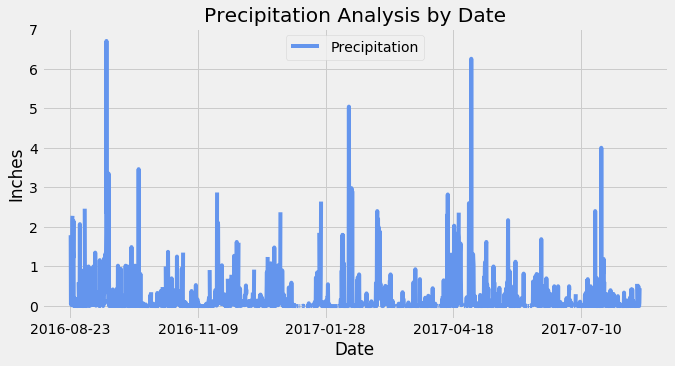

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
updated_df.plot(title="Precipitation Analysis by Date", figsize=(10,5), color = "cornflowerblue")

plt.legend(loc='upper center')
plt.ylabel("Inches")
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
updated_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
station = session.query(func.count(station.station)).all()

station[0][0]

9

In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active = [func.min(measurement.tobs),
         func.max(measurement.tobs),
         func.avg(measurement.tobs)]

active_info = session.query(*active).\
    filter(measurement.station == "USC00519281").all()

active_info

[(54.0, 85.0, 71.66378066378067)]

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

t_data = session.query(measurement.tobs).\
    filter(measurement.date >= one_year).\
    filter(measurement.station == "USC00519281").\
    order_by(measurement.date).all()

t_data_df = pd.DataFrame(t_data, columns=["tobs"])
t_data_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


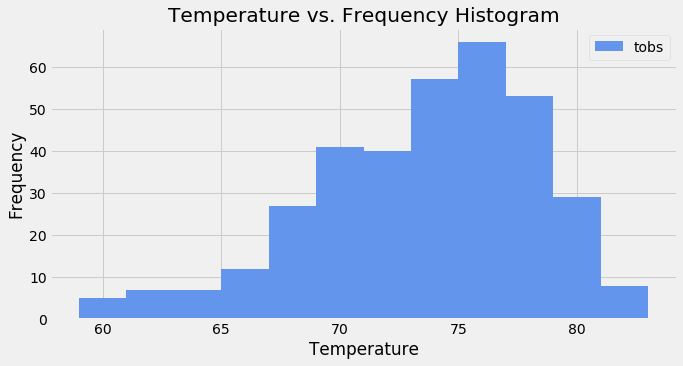

In [31]:
# Plot the Results as a Histogram with `bins=12`
t_data_df.plot.hist(bins=12, title="Temperature vs. Frequency Histogram", figsize=(10,5), color="cornflowerblue")
plt.xlabel("Temperature")
plt.legend(loc="upper right")

plt.show()

# Close session

In [32]:
# Close Session
session.close()